## First draft of modeling Tokenomics

To model the value of the `LasticDA` token over time:

1. **Linear Growth of DAtokenProof**: For this model we are assuming that the value of `DAtokenProof` rises linearly over time and it decreases the `DAtoken`
2. **User Inflows**: User inflows and outflows are marked as small deviations, modeled as noise. This is not accurate, a more accurate model of this has to be modelled.
3. **Foundation Influence**: We assume the DA foundation's deposits cause step-like increases in the `DAtoken` pool value at regular intervals, this might not be the case.
4. **LasticDA**: The intention of the `LasticDA` token is to smoothen out the curve and provide immediate liquidity to the users. It's value is also meant to be exchanged with the `DAToken` over time.

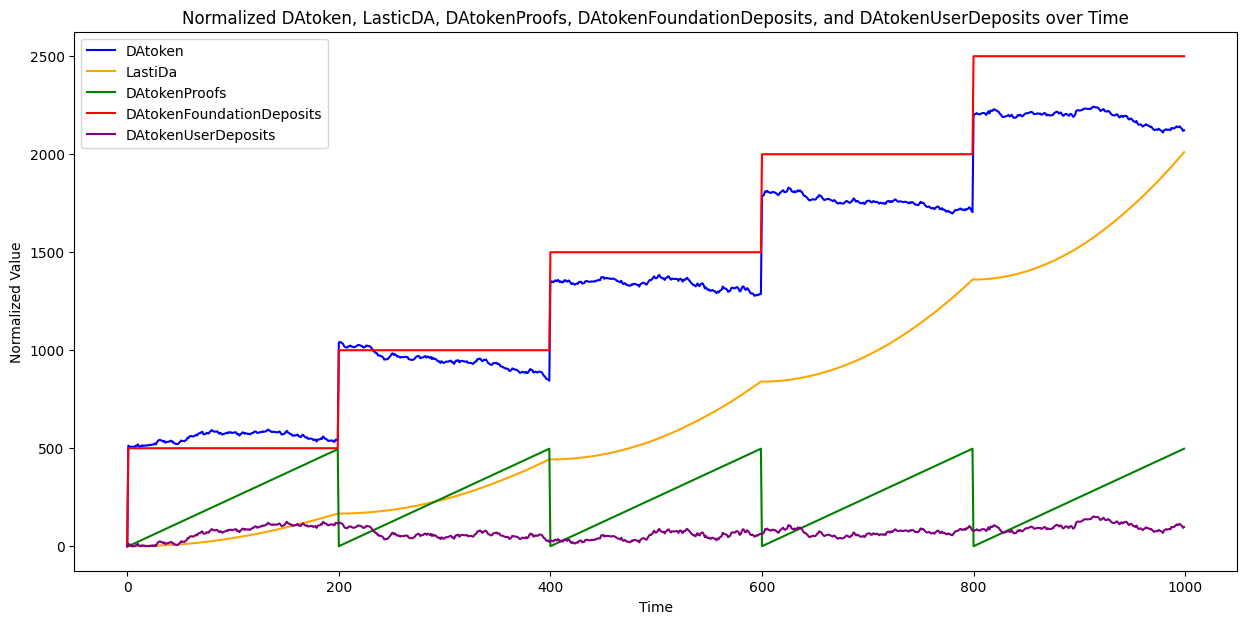

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
total_time = 1000  # Total time for the simulation
user_inflow_std = 5  # Standard deviation of the user inflow noise
foundation_steps = [1, 200, 400, 600, 800]  # Times when the foundation makes contributions
foundation_increase = 500  # Amount of increase due to foundation contribution

# Initialize arrays to store the values over time
DAtokenInPool = np.zeros(total_time)
LasticDA = np.zeros(total_time)
DAtokenProofs = np.zeros(total_time)
DAtokenFoundationDeposits = np.zeros(total_time)
DAtokenUserDeposits = np.zeros(total_time)

# Function to model the inflow/outflow from users
def user_inflow_outflow(time):
    return np.random.normal(0, user_inflow_std)

# Function to model the foundation contribution
def foundation_contribution(time):
    return foundation_increase if time in foundation_steps else 0

# Simulate the process over time
for t in range(1, total_time):
    # Reset DAtokenProofs to zero when foundation contributes
    if t in foundation_steps:
        DAtokenProofs[t] = 0
    else:
        # DAtokenProofs increase linearly over time
        # 0.005 was chosen arbitrarily to fit the plot
        DAtokenProofs[t] = DAtokenProofs[t-1] + 0.005

    # User inflow/outflow as noise
    user_in_outflow_value = user_inflow_outflow(t)
    DAtokenUserDeposits[t] = max(0, DAtokenUserDeposits[t-1] + user_in_outflow_value)
    if (DAtokenUserDeposits[t] > 0):
        DAtokenInPool[t] = DAtokenInPool[t-1] + user_in_outflow_value - DAtokenProofs[t]
    else:
        DAtokenInPool[t] = DAtokenInPool[t-1] - DAtokenProofs[t]
    
    # Foundation contribution as step increases
    foundation_contribution_value = foundation_contribution(t)
    DAtokenInPool[t] += foundation_contribution_value
    DAtokenFoundationDeposits[t] = DAtokenFoundationDeposits[t-1] + foundation_contribution_value
    
    # Minting of LasticDA proportional to the pool size and DAtokenProofs
    # This is an arbitrary choice to fit the plot - needs more research
    # A 10% minting rate was chosen arbitrarily to fit the plot
    if DAtokenInPool[t] > 0:
        LasticDA[t] = LasticDA[t-1] + DAtokenInPool[t] * DAtokenProofs[t] * 0.003
    else:
        LasticDA[t] = LasticDA[t-1]


# Plot the results
plt.figure(figsize=(15, 7))

plt.plot(DAtokenInPool, label='DAtoken', color='blue')
plt.plot(LasticDA, label='LastiDa', color='orange')
plt.plot(DAtokenProofs * 500, label='DAtokenProofs', color='green')  # Multiply by 500 to fit the plot
plt.plot(DAtokenFoundationDeposits, label='DAtokenFoundationDeposits', color='red')
plt.plot(DAtokenUserDeposits, label='DAtokenUserDeposits', color='purple')

plt.title('Normalized DAtoken, LasticDA, DAtokenProofs, DAtokenFoundationDeposits, and DAtokenUserDeposits over Time')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()

plt.show()


## Modeling Tokenomics - more accurate modeling User Inflows-Outflows

To model the value of the `LasticDA` token over time:

1. **Linear Growth of DAtokenProof**: For this model we are assuming that the value of `DAtokenProof` rises linearly over time and it decreases the `DAtoken`
2. **User Inflows**: User Inflows should stay the same as random noise over time
3. **User Outflows**: User Outflows should change, should be random over time, but they should be dependent on how much of the `LasticDA` token the user got over time, if the user decides to withdraw the `DAtoken` the `LasticDA` token should be burned as wel, there should also be a formula between the exchange of the `LasticDA` token for the `DAtoken`.
3. **Foundation Influence**: We assume the DA foundation's deposits cause step-like increases in the `DAtoken` pool value at regular intervals, this might not be the case.
4. **LasticDA**: The intention of the `LasticDA` token is to smoothen out the curve and provide immediate liquidity to the users. It's value is also meant to be exchanged with the `DAToken` over time.

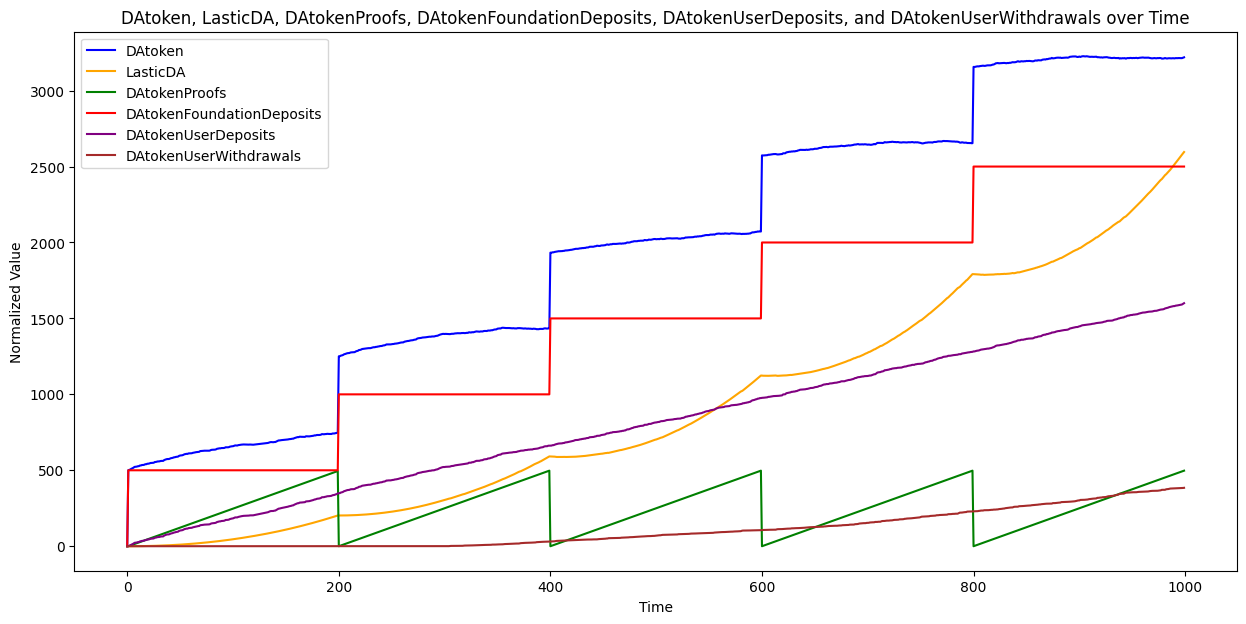

User Deposit and Outflow Log from Time 300 onward:
Time: 300, Deposit Amount: 0.007243692524197477, Withdraw Amount: 0.039393467945531745
Time: 301, Deposit Amount: 1.2666041832074693, Withdraw Amount: 0.15609272665393792
Time: 302, Deposit Amount: 0.4259699636065675, Withdraw Amount: 1.0320345749473658
Time: 303, Deposit Amount: 0.7814643828867631, Withdraw Amount: 0.28463183225134403
Time: 304, Deposit Amount: 0.2138777615255213, Withdraw Amount: 0.2926651625364067
Time: 305, Deposit Amount: 0.05706244152704856, Withdraw Amount: 0.2822770137393929
Time: 306, Deposit Amount: 2.602789173730859, Withdraw Amount: 0.17440952804065896
Time: 307, Deposit Amount: 1.648009548790018, Withdraw Amount: 0.32091979064198856
Time: 308, Deposit Amount: 0.17446129295173743, Withdraw Amount: 0.053229603918799336
Time: 309, Deposit Amount: 1.95802302507878, Withdraw Amount: 0.11401515565952798
Time: 310, Deposit Amount: 2.0001787250083702, Withdraw Amount: 0.00034191184319103666
Time: 311, Deposit Amou

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
total_time = 1000
user_inflow_std = 2
foundation_steps = [1, 200, 400, 600, 800]
foundation_increase = 500

# Initialize arrays
DAtokenInPool = np.zeros(total_time)
LasticDA = np.zeros(total_time)
DAtokenProofs = np.zeros(total_time)
DAtokenFoundationDeposits = np.zeros(total_time)
DAtokenUserDeposits = np.zeros(total_time)
DAtokenUserWithdrawals = np.zeros(total_time)

# List to store user deposits as (time, deposit amount) tuples
user_deposit_log = []
user_outflow_log = []

# User inflow function
def user_inflow():
    return np.abs(np.random.normal(0, user_inflow_std))

# User outflow function (modified to withdraw an arbitrary previous inflow deposit)
def user_outflow(lasticDA_balance, current_time):
    if current_time >= 300 and user_deposit_log:
        # Choose an arbitrary previous inflow deposit
        inflow_time, inflow_amount = user_deposit_log[np.random.randint(0, len(user_deposit_log))]
        time_in_pool = current_time - inflow_time
        
        # Withdraw all of the chosen inflow deposit proportional to the time it was in the pool
        withdrawal_amount = inflow_amount * (time_in_pool / total_time)
        DAtoWithdraw = min(withdrawal_amount, lasticDA_balance)
        
        user_outflow_log.append((current_time, DAtoWithdraw))
        
        return DAtoWithdraw, DAtoWithdraw
    else:
        return 0, 0

# Foundation contribution function
def foundation_contribution(time):
    return foundation_increase if time in foundation_steps else 0

# Simulation
for t in range(1, total_time):
    DAtokenProofs[t] = 0 if t in foundation_steps else DAtokenProofs[t-1] + 0.005

    user_inflow_value = user_inflow()

    user_outflow_value, lasticDAreduction = user_outflow(LasticDA[t-1], t)

    if user_inflow_value > 0:
        user_deposit_log.append((t, user_inflow_value))
    
    LasticDA[t] = LasticDA[t-1] - lasticDAreduction
    
    DAtokenUserDeposits[t] = DAtokenUserDeposits[t-1] + user_inflow_value
    DAtokenInPool[t] = DAtokenInPool[t-1] + user_inflow_value - DAtokenProofs[t] - user_outflow_value
    DAtokenUserWithdrawals[t] = DAtokenUserWithdrawals[t-1] + user_outflow_value
    
    foundation_contribution_value = foundation_contribution(t)
    DAtokenInPool[t] += foundation_contribution_value
    DAtokenFoundationDeposits[t] = DAtokenFoundationDeposits[t-1] + foundation_contribution_value
    
    if DAtokenInPool[t-1] > 0:
        LasticDA[t] += DAtokenInPool[t] * DAtokenProofs[t] * 0.003

# Plot results
plt.figure(figsize=(15, 7))

plt.plot(DAtokenInPool, label='DAtoken', color='blue')
plt.plot(LasticDA, label='LasticDA', color='orange')
plt.plot(DAtokenProofs * 500, label='DAtokenProofs', color='green')  # Multiply by 500 to fit the plot
plt.plot(DAtokenFoundationDeposits, label='DAtokenFoundationDeposits', color='red')
plt.plot(DAtokenUserDeposits, label='DAtokenUserDeposits', color='purple')
plt.plot(DAtokenUserWithdrawals, label='DAtokenUserWithdrawals', color='brown')

plt.title('DAtoken, LasticDA, DAtokenProofs, DAtokenFoundationDeposits, DAtokenUserDeposits, and DAtokenUserWithdrawals over Time')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()

plt.show()

# Print the user deposit and outflow logs starting from time 300 onward
print("User Deposit and Outflow Log from Time 300 onward:")
for deposit, outflow in zip(user_deposit_log, user_outflow_log):
    if deposit[0] >= 300:
        print(f"Time: {deposit[0]}, Deposit Amount: {deposit[1]}, Withdraw Amount: {outflow[1]}")
